100%|██████████| 2000/2000 [13:44<00:00,  2.42it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 532ms/step - accuracy: 0.0284 - loss: 4.0034 - val_accuracy: 0.0550 - val_loss: 3.5516
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.0782 - loss: 3.4353 - val_accuracy: 0.1175 - val_loss: 3.1580
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 545ms/step - accuracy: 0.1631 - loss: 3.0044 - val_accuracy: 0.1850 - val_loss: 2.9183
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 612ms/step - accuracy: 0.2448 - loss: 2.6925 - val_accuracy: 0.2350 - val_loss: 2.6308
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 584ms/step - accuracy: 0.2970 - loss: 2.4181 - val_accuracy: 0.3125 - val_loss: 2.3814
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 569ms/step - accuracy: 0.3920 - loss: 2.0681 - val_accuracy: 0.3775 - val_loss: 2.1900
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 584ms/step - accuracy: 0.4457 - loss: 1.9151 - val_accuracy: 0.3925 - val_loss: 2.1713
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 593ms/step - accuracy: 0.4694 - loss: 1.7995 - 

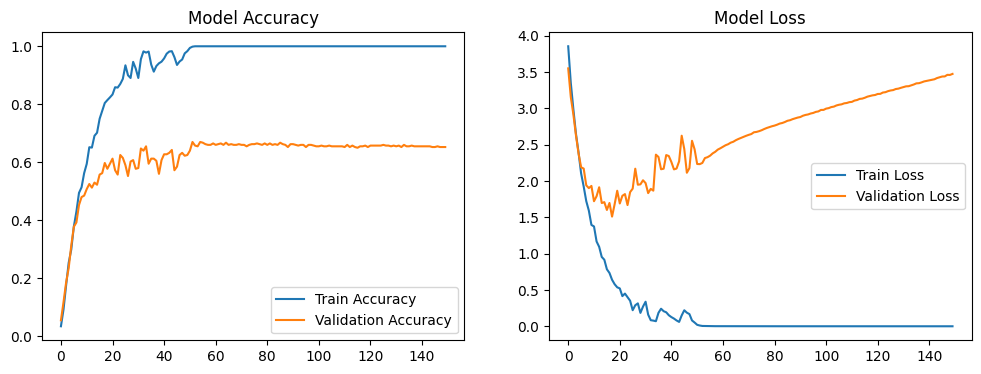

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.6658 - loss: 3.6829
Test Accuracy: 0.6525
Final Test Accuracy: 0.6525
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0     0.4444    0.6667    0.5333         6
           1     0.4444    0.6667    0.5333         6
           2     0.7778    0.7778    0.7778         9
           3     1.0000    0.8462    0.9167        13
           4     0.8750    0.6364    0.7368        11
           5     0.7273    0.6667    0.6957        12
           6     1.0000    0.5000    0.6667        12
           7     0.7500    1.0000    0.8571         6
           8     0.6667    0.4000    0.5000        10
           9     0.6667    0.6667    0.6667         6
          10     0.7500    0.6000    0.6667         5
          11     0.7143    0.8333    0.7692        12
          12     0.6000    0.6667    0.6316         9
          13     0.8000    0.6667    0.7273         6
          14     0.5714    0.6667    0.6154         6
          15     0.5000    0.2857    0.3636        14
          16     0.7143    0.5556    0.6250         9
   

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load ESC-50 metadata
esc50_csv_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/meta/esc50.csv"
esc50_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/audio"

metadata = pd.read_csv(esc50_csv_path)

# Function to extract stacked features (MFCC + LM)
def extract_features(file_path, sr=22050, n_mels=128, n_mfcc=40, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)

        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        def resize_feature(feature, target_size):
            return np.pad(feature, ((0, max(0, target_size[0] - feature.shape[0])),
                                     (0, max(0, target_size[1] - feature.shape[1]))), mode='constant')

        mel_spec = resize_feature(mel_spec, target_size)
        mfcc = resize_feature(mfcc, target_size)

        stacked_features = np.stack([mel_spec, mfcc], axis=-1)
        return stacked_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Prepare dataset
X, y = [], []
for i in tqdm(range(len(metadata))):
    file_path = os.path.join(esc50_audio_dir, metadata.loc[i, "filename"])
    label = metadata.loc[i, "target"]

    features = extract_features(file_path)
    if features is not None:
        X.append(features)
        y.append(label)

X = np.array(X)
y = to_categorical(y, num_classes=50)

# Resize images (Ensure uniformity)
X_resized = np.array([tf.image.resize(img, (128, 128)).numpy() for img in X])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resized, y, test_size=0.2, random_state=42)

# Define CNN model based on the paper
def create_cnn_model(input_shape, num_classes=50):
    model = Sequential([
        Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(32, (2, 2), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (2, 2), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (2, 2), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),

        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the CNN model
input_shape = (128, 128, 2)
num_classes = 50
model = create_cnn_model(input_shape, num_classes)

# Train model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Print final test accuracy
print(f"Final Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report
import numpy as np

# Extract final Training and Validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Predict on test set
y_pred_probs = model.predict(X_test)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Compute Precision, Recall, and F1-score
report = classification_report(y_true, y_pred, digits=4)
print("Classification Report:\n", report)

# Print final accuracy values
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Save trained model
esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/CNN1_MFCC_LM_ESC50.h5"
model.save(esc50_model_path)
print("ESC-50 pre-trained model saved successfully!")




In [ ]:
# Load pre-trained ESC-50 model
esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/CNN1_MFCC_LM_ESC50.h5"
model = load_model(esc50_model_path)
print("Pre-trained ESC-50 model loaded successfully!")

# Load UrbanSound8K metadata
urbansound_csv_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
urbansound_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"

metadata = pd.read_csv(urbansound_csv_path)

# Prepare UrbanSound8K dataset
X, y = [], []
for i in tqdm(range(len(metadata))):
    file_name = metadata.loc[i, "slice_file_name"]
    folder = f"fold{metadata.loc[i, 'fold']}"
    file_path = os.path.join(urbansound_audio_dir, folder, file_name)
    label = metadata.loc[i, "classID"]
    features = extract_features(file_path)
    if features is not None:
        X.append(features)
        y.append(label)

X = np.array([img for img in X if img is not None and img.shape == (128, 128, 2)])
y = to_categorical(y, num_classes=10)

if len(X) == 0:
    raise ValueError("No valid features extracted for UrbanSound8K. Check file paths and extract_features() function.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modify last layer to match UrbanSound8K's 10 classes
model.pop()
model.add(Dense(10, activation='softmax'))

# Recompile and fine-tune
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, digits=4)
print("Classification Report:", report)

# Save fine-tuned model
urbansound_model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/CNN1_MFCC_LM_UrbanSound8K.h5"
model.save(urbansound_model_path)
print("Fine-tuned UrbanSound8K model saved successfully!")


Pre-trained ESC-50 model loaded successfully!


 41%|████      | 3555/8732 [03:12<03:37, 23.75it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8324/8732 [07:21<00:14, 28.30it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
 95%|█████████▌| 8329/8732 [07:21<00:12, 33.38it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [07:42<00:00, 18.90it/s]


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 122s 546ms/step - accuracy: 0.3650 - loss: 2.2028 - val_accuracy: 0.6686 - val_loss: 1.0678
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 124s 566ms/step - accuracy: 0.6871 - loss: 0.9779 - val_accuracy: 0.7293 - val_loss: 0.8647
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 124s 565ms/step - accuracy: 0.7511 - loss: 0.7774 - val_accuracy: 0.7533 - val_loss: 0.7653
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 139s 552ms/step - accuracy: 0.7803 - loss: 0.6881 - val_accuracy: 0.7899 - val_loss: 0.6841
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 124s 567ms/step - accuracy: 0.8172 - loss: 0.5906 - val_accuracy: 0.8174 - val_loss: 0.6103
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 539ms/step - accuracy: 0.8359 - loss: 0.5346 - val_accuracy: 0.8306 - val_loss: 0.5786
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 140s 528ms/step - accuracy: 0.8527 - loss: 0.4713 - val_accuracy: 0.8317 - val_loss: 0.5553
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 145s 542ms/step - accuracy: 0.8616 -

Classification Report:               precision    recall  f1-score   support

           0     0.9409    0.9409    0.9409       203
           1     0.9294    0.9186    0.9240        86
           2     0.7422    0.9126    0.8186       183
           3     0.9492    0.8358    0.8889       201
           4     0.9427    0.8786    0.9095       206
           5     0.9442    0.9637    0.9538       193
           6     0.9583    0.9583    0.9583        72
           7     0.9067    0.9808    0.9423       208
           8     0.9451    0.9394    0.9422       165
           9     0.9420    0.8478    0.8924       230

    accuracy                         0.9130      1747
   macro avg     0.9201    0.9177    0.9171      1747
weighted avg     0.9182    0.9130    0.9136      1747

Fine-tuned UrbanSound8K model saved successfully!


219/219 ━━━━━━━━━━━━━━━━━━━━ 32s 143ms/step - accuracy: 0.9819 - loss: 0.0534
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.9054 - loss: 0.3928
Training Accuracy: 0.9834
Validation Accuracy: 0.9130
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step
Precision: 0.9201
Recall: 0.9177
F1 Score: 0.9171
Classification Report:               precision    recall  f1-score   support

           0     0.9409    0.9409    0.9409       203
           1     0.9294    0.9186    0.9240        86
           2     0.7422    0.9126    0.8186       183
           3     0.9492    0.8358    0.8889       201
           4     0.9427    0.8786    0.9095       206
           5     0.9442    0.9637    0.9538       193
           6     0.9583    0.9583    0.9583        72
           7     0.9067    0.9808    0.9423       208
           8     0.9451    0.9394    0.9422       165
           9     0.9420    0.8478    0.8924       230

    accuracy                         0.9130      1747
   macro avg     0.9201    0.

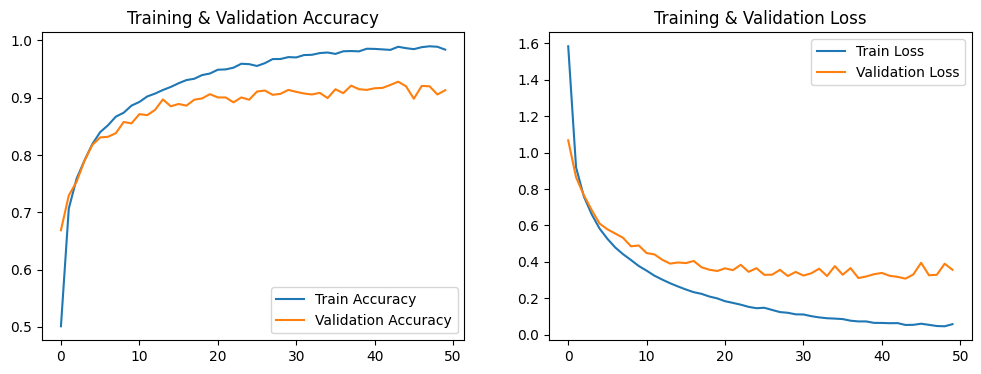

In [ ]:
# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(y_true_classes, y_pred_classes, digits=4)
print("Classification Report:", report)

# Plot Training & Validation Loss and Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


Pre-trained ESC-50 model loaded successfully!


 41%|████      | 3555/8732 [04:25<03:39, 23.57it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8324/8732 [09:19<00:12, 32.42it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [09:40<00:00, 15.05it/s]


Extracted features: (1260, 128, 128, 2), Labels: (1260, 10)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 559ms/step - accuracy: 0.2409 - loss: 2.6345 - val_accuracy: 0.5397 - val_loss: 1.5224
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 515ms/step - accuracy: 0.6132 - loss: 1.3245 - val_accuracy: 0.6667 - val_loss: 1.1738
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 713ms/step - accuracy: 0.7053 - loss: 1.0646 - val_accuracy: 0.7222 - val_loss: 1.0066
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 560ms/step - accuracy: 0.7412 - loss: 0.8341 - val_accuracy: 0.7579 - val_loss: 0.8853
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - accuracy: 0.7673 - loss: 0.7669 - val_accuracy: 0.7738 - val_loss: 0.8019
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 496ms/step - accuracy: 0.8258 - loss: 0.6155 - val_accuracy: 0.7976 - val_loss: 0.7384
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 509ms/step - accuracy: 0.8438 - loss: 0.5795 - val_accuracy: 0.8452 - val_loss: 0.6805
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━

Classification Report:
               precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667         1
           1     0.9500    0.9500    0.9500        40
           2     1.0000    0.6000    0.7500         5
           3     0.8788    0.9667    0.9206        60
           4     0.9355    0.7632    0.8406        38
           5     0.4286    0.7500    0.5455         4
           6     0.9667    0.9667    0.9667        60
           7     0.9024    1.0000    0.9487        37
           8     1.0000    0.2857    0.4444         7

    accuracy                         0.9087       252
   macro avg     0.8402    0.8091    0.7815       252
weighted avg     0.9202    0.9087    0.9047       252

Fine-tuned UrbanSound8K model saved successfully!


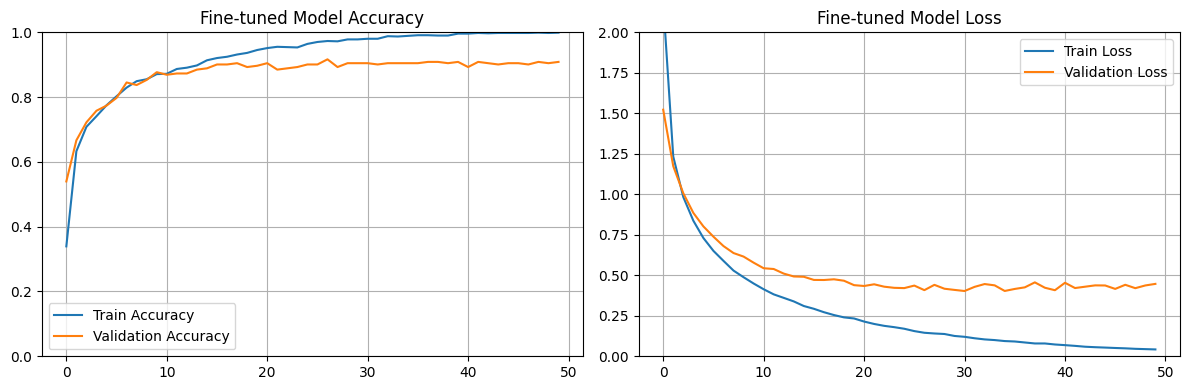

CNN1 training history saved!


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# ====================================================
# Feature Extraction Function: MFCC + Log-Mel
# ====================================================
def extract_features(file_path, sr=22050, n_mels=128, n_mfcc=40, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)

        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        def resize_feature(feature, target_size):
            return np.pad(feature, ((0, max(0, target_size[0] - feature.shape[0])),
                                     (0, max(0, target_size[1] - feature.shape[1]))), mode='constant')

        mel_spec = resize_feature(mel_spec, target_size)
        mfcc = resize_feature(mfcc, target_size)

        stacked_features = np.stack([mel_spec, mfcc], axis=-1)
        return stacked_features
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# ====================================================
# Load Pre-trained ESC-50 Model
# ====================================================
esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/CNN1_MFCC_LM_ESC50.h5"
loaded_model = load_model(esc50_model_path)
print("Pre-trained ESC-50 model loaded successfully!")

# ====================================================
# Rebuild Model Without Last Layer
# ====================================================
model = Sequential(loaded_model.layers[:-1])
model.add(Dense(10, activation='softmax', name='urban_output'))

# ====================================================
# Load UrbanSound8K Metadata
# ====================================================
urbansound_csv_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
urbansound_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"
metadata = pd.read_csv(urbansound_csv_path)

# ====================================================
# Extract Features and Labels
# ====================================================
X_raw, y_raw = [], []
for i in tqdm(range(len(metadata))):
    file_name = metadata.loc[i, "slice_file_name"]
    folder = f"fold{metadata.loc[i, 'fold']}"
    file_path = os.path.join(urbansound_audio_dir, folder, file_name)
    label = metadata.loc[i, "classID"]

    features = extract_features(file_path)
    if features is not None and features.shape == (128, 128, 2):
        X_raw.append(features)
        y_raw.append(label)

# ====================================================
# Final Dataset Preparation
# ====================================================
X = np.array(X_raw)
y = to_categorical(y_raw, num_classes=10)

if len(X) == 0:
    raise ValueError("No valid features extracted for UrbanSound8K.")

print(f"Extracted features: {X.shape}, Labels: {y.shape}")

# ====================================================
# Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================================================
# Compile and Fine-tune
# ====================================================
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ====================================================
# Evaluate Model
# ====================================================
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# ====================================================
# Classification Report
# ====================================================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, digits=4)
print("Classification Report:\n", report)

# ====================================================
# Save Fine-tuned Model
# ====================================================
urbansound_model_path = "/content/drive/MyDrive/Colab Notebooks/saved_models/CNN1_MFCC_LM_UrbanSound8K.h5"
model.save(urbansound_model_path)
print("Fine-tuned UrbanSound8K model saved successfully!")

# ====================================================
# Plot Training History
# ====================================================
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.title('Fine-tuned Model Accuracy')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim(0, 2)
plt.legend()
plt.title('Fine-tuned Model Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# ====================================================
# Save Training History to .npy Files
# ====================================================
result_dir = "/content/drive/MyDrive/Colab Notebooks/Models/Result"
np.save(os.path.join(result_dir, "cnn1_LM_MFCC_train_acc.npy"), history.history['accuracy'])
np.save(os.path.join(result_dir, "cnn1_LM_MFCC_val_acc.npy"), history.history['val_accuracy'])
np.save(os.path.join(result_dir, "cnn1_LM_MFCC_train_loss.npy"), history.history['loss'])
np.save(os.path.join(result_dir, "cnn1_LM_MFCC_val_loss.npy"), history.history['val_loss'])

print("CNN1 training history saved!")
